In [16]:
import numpy as np
import pandas as pd

In [17]:
base = pd.read_csv('C:/Users/thais/OneDrive/Documentos/Diretório theuzas/regressão/enem_2019_tratado.csv',
                   sep=',', encoding='iso-8859-1')

In [18]:
base.shape

(499940, 28)

In [19]:
base.isnull().sum()

NU_INSCRICAO                    0
NO_MUNICIPIO_RESIDENCIA         0
IDADE                           0
SEXO                            0
TP_ESTADO_CIVIL                 0
RACA                            0
TP_NACIONALIDADE                0
TP_ST_CONCLUSAO                 0
ESCOLA                          0
CO_ESCOLA                  323046
NO_MUNICIPIO_ESC           323046
TP_PRESENCA_CN                  0
TP_PRESENCA_CH                  0
TP_PRESENCA_LC                  0
TP_PRESENCA_MT                  0
NOTA_CN                         0
NOTA_CH                         0
NOTA_LC                         0
NOTA_MT                         0
TP_LINGUA                       0
TP_STATUS_REDACAO               0
COMP1                           0
COMP2                           0
COMP3                           0
COMP4                           0
COMP5                           0
NOTA_REDACAO                    0
INTERNET                        0
dtype: int64

In [20]:
base2 = base

In [21]:
base2 = base2.drop(columns='CO_ESCOLA') # EXCLUINDO VARIAVEIS Q TEM NA E N PRECISA PARA A ANALISE
base2 = base2.drop(columns='NO_MUNICIPIO_ESC')

In [22]:
base2.dtypes

NU_INSCRICAO                object
NO_MUNICIPIO_RESIDENCIA     object
IDADE                        int64
SEXO                        object
TP_ESTADO_CIVIL              int64
RACA                        object
TP_NACIONALIDADE             int64
TP_ST_CONCLUSAO              int64
ESCOLA                      object
TP_PRESENCA_CN               int64
TP_PRESENCA_CH               int64
TP_PRESENCA_LC               int64
TP_PRESENCA_MT               int64
NOTA_CN                    float64
NOTA_CH                    float64
NOTA_LC                    float64
NOTA_MT                    float64
TP_LINGUA                   object
TP_STATUS_REDACAO          float64
COMP1                      float64
COMP2                      float64
COMP3                      float64
COMP4                      float64
COMP5                      float64
NOTA_REDACAO               float64
INTERNET                    object
dtype: object

In [23]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [24]:
# criação do modelo 

modelo1 = smf.ols('NOTA_REDACAO~IDADE+TP_ST_CONCLUSAO+COMP1+COMP2+COMP3+COMP4+COMP5', data=base2).fit()

In [25]:
residuos = modelo1.resid
residuos

0         1.136868e-13
1        -1.591616e-12
2        -1.364242e-12
3        -1.591616e-12
4         0.000000e+00
              ...     
499935   -1.250555e-12
499936   -2.160050e-12
499937   -1.477929e-12
499938   -1.136868e-12
499939   -9.094947e-13
Length: 499940, dtype: float64

In [26]:
# normalidade nos residuos

import scipy.stats as stats

stats.shapiro(residuos)

c:\Users\thais\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.7777347564697266, pvalue=0.0)

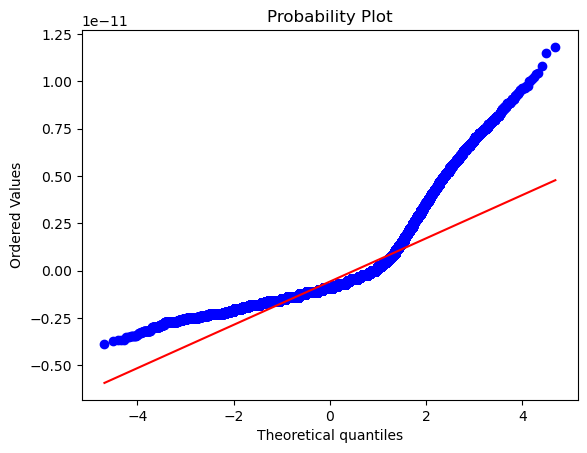

In [27]:
import matplotlib.pyplot as plt

stats.probplot(residuos, dist='norm', plot=plt)
plt.show()

In [28]:
# analise da homocedasticidade

from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [29]:
sms.het_breuschpagan(modelo1.resid, modelo1.model.exog)

(320037.19962138665, 0.0, 127050.22374336008, 0.0)

In [30]:
# outliers no residuo

#outliers = modelo1.outlier_test()


In [31]:
# independencia dos resíduos

# a estatística do teste é 2*(1-r), onde r é autocorrelação dos resíduos. Assim para r=0, a estatística do teste 
# é igual a 2, indicando independência dos resíduos (o resultado vai de 0 a 4) 

import statsmodels
import statsmodels.stats
import statsmodels.stats.stattools
from statsmodels.tools.sm_exceptions import ValueWarning

estatis = statsmodels.stats.stattools.durbin_watson(modelo1.resid)
estatis

1.6320128683689994

In [32]:
# Multicolinearidade 

var = base2[['IDADE','TP_ST_CONCLUSAO','COMP1','COMP2','COMP3','COMP4','COMP5']]
var.head

<bound method NDFrame.head of         IDADE  TP_ST_CONCLUSAO  COMP1  COMP2  COMP3  COMP4  COMP5
0          22                1  160.0  200.0  180.0  200.0  200.0
1          17                2  160.0  120.0  200.0  200.0  200.0
2          19                2   80.0  160.0  120.0  100.0  100.0
3          17                2  120.0  120.0  120.0  120.0   80.0
4          23                1  160.0  200.0  180.0  180.0  160.0
...       ...              ...    ...    ...    ...    ...    ...
499935     18                1  100.0  120.0  120.0  140.0  100.0
499936     17                2   80.0  120.0  140.0  120.0  100.0
499937     17                2  120.0   80.0   60.0  120.0    0.0
499938     17                2  160.0  120.0  160.0  140.0  160.0
499939     18                2  120.0  120.0  120.0  120.0  140.0

[499940 rows x 7 columns]>

In [33]:
correlacoes = var.corr(method='pearson')
correlacoes

# considera multicolinearidade com p>0.9

,IDADE,TP_ST_CONCLUSAO,COMP1,COMP2,COMP3,COMP4,COMP5
IDADE,1.000000,-0.434499,-0.156264,-0.138625,-0.152176,-0.182703,-0.148348
TP_ST_CONCLUSAO,-0.434499,1.000000,-0.008287,-0.021282,-0.026388,0.000410,-0.006360
COMP1,-0.156264,-0.008287,1.000000,0.639200,0.740870,0.779972,0.549231
COMP2,-0.138625,-0.021282,0.639200,1.000000,0.830398,0.680512,0.631106
COMP3,-0.152176,-0.026388,0.740870,0.830398,1.000000,0.771946,0.693656
COMP4,-0.182703,0.000410,0.779972,0.680512,0.771946,1.000000,0.622305
COMP5,-0.148348,-0.006360,0.549231,0.631106,0.693656,0.622305,1.000000


In [34]:
# podemos calcular o fator de inflação de variância 
# que mede quanto a variância do coeficiente estimado para uma variável é inflada devido à multicolinearidade com as outras variáveis independentes. 
# VIFs maiores que 10 indicam alta multicolinearidade, enquanto valores entre 5 e 10 podem ser preocupantes

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

vif = add_constant(var)
pd.Series([variance_inflation_factor(vif.values, j) for j in range(vif.shape[1])], index=vif.columns)

const              64.942261
IDADE               1.290392
TP_ST_CONCLUSAO     1.246694
COMP1               2.910273
COMP2               3.309590
COMP3               5.026433
COMP4               3.385162
COMP5               2.032711
dtype: float64

In [35]:
print(modelo1.summary())

                            OLS Regression Results                            
Dep. Variable:           NOTA_REDACAO   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.036e+33
Date:                Tue, 18 Jun 2024   Prob (F-statistic):               0.00
Time:                        09:10:04   Log-Likelihood:             1.2931e+07
No. Observations:              499940   AIC:                        -2.586e+07
Df Residuals:                  499932   BIC:                        -2.586e+07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.178e-12   1.61e-14    2

In [36]:
predict = modelo1.predict()

In [37]:
base2['previsao'] = modelo1.fittedvalues

In [38]:
dad = base2['previsao'] == base2['NOTA_REDACAO']

In [39]:
base2.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,TP_PRESENCA_CN,...,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET,previsao
0,"1,90E+11",Santa Isabel,22,M,1,parda,1,1,não_respondeu,1,...,Inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,Sim,940.0
1,"1,90E+11",São Paulo,17,F,1,parda,1,2,privada,1,...,Inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,Não,880.0
2,"1,90E+11",São Bernardo do Campo,19,M,1,parda,1,2,pública,1,...,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,Sim,560.0
3,"1,90E+11",Embu-Guaçu,17,F,1,parda,1,2,pública,1,...,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim,560.0
4,"1,90E+11",Guarulhos,23,F,1,branca,1,1,não_respondeu,1,...,Inglês,1.0,160.0,200.0,180.0,180.0,160.0,880.0,Sim,880.0


com sklearn


In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
independente = base2[['IDADE','TP_ST_CONCLUSAO','COMP1','COMP2','COMP3','COMP4','COMP5']]
dependente = base2[['NOTA_REDACAO']]

In [44]:
modelo2 = LinearRegression()
modelo2.fit(independente, dependente)

LinearRegression()

In [45]:
modelo2.intercept_

array([2.16004992e-12])

In [46]:
modelo2.coef_

array([[-5.67495430e-14,  1.71391244e-12,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00]])